In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.graph_objects as go
import seaborn as sns

In [6]:
fifa = pd.read_csv('./fifa_players_.csv', na_values=[' ', np.nan])
fifa

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


In [7]:
fifa.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [8]:
fifa.isna().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [9]:
fifa.drop(columns=['full_name', 'wage_euro', 'release_clause_euro', 'birth_date'], inplace=True)
fifa

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,Right,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,Right,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,23,182.88,79.8,LB,Slovakia,59,67,190000.0,Left,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,22,185.42,89.8,GK,Netherlands,59,67,170000.0,Right,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,Right,...,58,38,15,54,52,50,53,16,18,17


In [10]:
fifa['height_m'] = fifa['height_cm']/100
fifa['BMI'] = round(fifa['weight_kgs']/fifa['height_m']**2, 2)
fifa.drop(columns=['height_cm'], inplace=True)

In [11]:
fifa

,name,age,weight_kgs,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,height_m,BMI
0,L. Messi,31,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,Left,5,...,22,94,94,75,96,33,28,26,1.7018,24.90
1,C. Eriksen,27,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,Right,3,...,56,84,91,67,88,59,57,22,1.5494,31.74
2,P. Pogba,25,83.9,"CM,CAM",France,88,91,73000000.0,Right,4,...,64,82,88,82,87,63,67,67,1.9050,23.12
3,L. Insigne,27,59.0,"LW,ST",Italy,88,88,62000000.0,Right,3,...,26,83,87,61,83,51,24,22,1.6256,22.33
4,K. Koulibaly,27,88.9,CB,Senegal,88,91,60000000.0,Right,3,...,88,24,49,33,80,91,88,87,1.8796,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,Right,1,...,41,60,64,63,56,40,20,18,1.7526,24.35
17950,M. Sipľak,23,79.8,LB,Slovakia,59,67,190000.0,Left,1,...,55,42,39,32,52,53,64,60,1.8288,23.86
17951,J. Bekkema,22,89.8,GK,Netherlands,59,67,170000.0,Right,1,...,10,5,25,16,47,9,12,13,1.8542,26.12
17952,A. Al Yami,21,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,Right,1,...,15,54,52,50,53,16,18,17,1.7526,21.13


In [12]:
fifa.drop(columns=['height_m', 'weight_kgs'], inplace=True)
fifa

,name,age,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,BMI
0,L. Messi,31,"CF,RW,ST",Argentina,94,94,110500000.0,Left,5,4,...,48,22,94,94,75,96,33,28,26,24.90
1,C. Eriksen,27,"CAM,RM,CM",Denmark,88,89,69500000.0,Right,3,5,...,46,56,84,91,67,88,59,57,22,31.74
2,P. Pogba,25,"CM,CAM",France,88,91,73000000.0,Right,4,4,...,78,64,82,88,82,87,63,67,67,23.12
3,L. Insigne,27,"LW,ST",Italy,88,88,62000000.0,Right,3,4,...,34,26,83,87,61,83,51,24,22,22.33
4,K. Koulibaly,27,CB,Senegal,88,91,60000000.0,Right,3,3,...,87,88,24,49,33,80,91,88,87,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,"RM,CAM,CM",Scotland,67,70,975000.0,Right,1,3,...,69,41,60,64,63,56,40,20,18,24.35
17950,M. Sipľak,23,LB,Slovakia,59,67,190000.0,Left,1,3,...,62,55,42,39,32,52,53,64,60,23.86
17951,J. Bekkema,22,GK,Netherlands,59,67,170000.0,Right,1,1,...,27,10,5,25,16,47,9,12,13,26.12
17952,A. Al Yami,21,"ST,LM",Saudi Arabia,59,71,280000.0,Right,1,4,...,38,15,54,52,50,53,16,18,17,21.13


In [13]:
fifa.isna().sum()

name                                 0
age                                  0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                              0
dribbling                            0
curve                                0
freekick_accuracy                    0
long_passing                         0
ball_control             

In [14]:
fifa_national_team = fifa[pd.notna(fifa['national_team'])]
fifa_national_team

,name,age,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,BMI
0,L. Messi,31,"CF,RW,ST",Argentina,94,94,110500000.0,Left,5,4,...,48,22,94,94,75,96,33,28,26,24.90
1,C. Eriksen,27,"CAM,RM,CM",Denmark,88,89,69500000.0,Right,3,5,...,46,56,84,91,67,88,59,57,22,31.74
2,P. Pogba,25,"CM,CAM",France,88,91,73000000.0,Right,4,4,...,78,64,82,88,82,87,63,67,67,23.12
3,L. Insigne,27,"LW,ST",Italy,88,88,62000000.0,Right,3,4,...,34,26,83,87,61,83,51,24,22,22.33
5,V. van Dijk,27,CB,Netherlands,88,90,59500000.0,Right,3,3,...,82,88,41,60,62,87,90,89,84,24.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,E. Hazard,28,"LW,CF",Belgium,91,91,93000000.0,Right,4,4,...,54,41,87,89,86,91,34,27,22,25.54
17941,K. De Bruyne,27,"CAM,CM",Belgium,91,92,102000000.0,Right,4,5,...,76,61,87,94,79,90,68,58,51,29.12
17942,De Gea,28,GK,Spain,91,93,72000000.0,Right,4,3,...,38,30,12,68,40,70,25,21,13,20.45
17943,Neymar Jr,27,"LW,CAM",Brazil,92,92,108000000.0,Right,5,5,...,56,36,89,88,81,94,27,24,33,22.14


In [15]:
fifa_national_team.isna().sum()

name                             0
age                              0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
national_team                    0
national_rating                  0
national_team_position           0
national_jersey_number           0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility             

In [16]:
fifa_national_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 17944
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           857 non-null    object 
 1   age                            857 non-null    int64  
 2   positions                      857 non-null    object 
 3   nationality                    857 non-null    object 
 4   overall_rating                 857 non-null    int64  
 5   potential                      857 non-null    int64  
 6   value_euro                     857 non-null    float64
 7   preferred_foot                 857 non-null    object 
 8   international_reputation(1-5)  857 non-null    int64  
 9   weak_foot(1-5)                 857 non-null    int64  
 10  skill_moves(1-5)               857 non-null    int64  
 11  body_type                      857 non-null    object 
 12  national_team                  857 non-null    o

In [17]:
fifa_national_team.reset_index(inplace=True)

In [18]:
fifa_national_team['nationality'].value_counts()

Argentina              23
Denmark                23
Chile                  23
United States          23
Scotland               23
England                23
Brazil                 23
Switzerland            23
Spain                  23
Germany                23
Netherlands            23
Italy                  23
France                 23
Colombia               22
Mexico                 22
Northern Ireland       22
Austria                22
Greece                 22
Norway                 22
Australia              22
Turkey                 21
Poland                 21
Wales                  21
Cameroon               21
Czech Republic         21
Portugal               21
Republic of Ireland    21
Sweden                 20
Canada                 20
Finland                20
Belgium                20
Uruguay                20
Venezuela              18
Slovenia               15
Ivory Coast            15
Peru                   14
Russia                 13
New Zealand            13
Iceland     

In [19]:
fifa_national_team.iloc[:, :].describe()

,index,age,overall_rating,potential,value_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,national_jersey_number,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,BMI
count,857.000000,857.000000,857.000000,857.000000,8.570000e+02,857.000000,857.000000,857.000000,857.000000,857.000000,...,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,12016.985998,26.614936,75.885648,78.847141,1.259303e+07,1.611435,3.170362,2.763127,76.341890,12.456243,...,63.511085,54.059510,58.295216,63.731622,53.890315,69.644107,53.600933,53.702450,50.884481,25.119802
std,6997.851581,3.629920,5.970214,6.029036,1.598347e+07,0.863058,0.752820,0.952686,4.786667,8.098157,...,17.776722,22.685373,22.138538,13.757083,17.582771,10.655527,22.467149,24.425146,24.529345,3.844208
min,0.000000,18.000000,58.000000,62.000000,2.200000e+05,1.000000,1.000000,1.000000,63.000000,1.000000,...,11.000000,7.000000,4.000000,12.000000,10.000000,23.000000,7.000000,9.000000,8.000000,18.570000
25%,2480.000000,24.000000,72.000000,74.000000,3.000000e+06,1.000000,3.000000,2.000000,73.000000,6.000000,...,54.000000,32.000000,48.000000,56.000000,42.000000,64.000000,35.000000,30.000000,25.000000,22.590000
50%,15805.000000,26.000000,75.000000,79.000000,7.000000e+06,1.000000,3.000000,3.000000,75.000000,12.000000,...,68.000000,63.000000,66.000000,66.000000,57.000000,71.000000,62.000000,64.000000,61.000000,23.750000
75%,17352.000000,29.000000,80.000000,83.000000,1.500000e+07,2.000000,4.000000,3.000000,81.000000,18.000000,...,76.000000,74.000000,74.000000,74.000000,67.000000,76.000000,72.000000,74.000000,72.000000,25.770000
max,17944.000000,39.000000,94.000000,95.000000,1.105000e+08,5.000000,5.000000,5.000000,85.000000,99.000000,...,94.000000,92.000000,95.000000,94.000000,90.000000,96.000000,94.000000,93.000000,90.000000,37.410000


In [20]:
fifa_national_team[fifa_national_team['positions'] == 'GK'].describe()

,index,age,overall_rating,potential,value_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),national_rating,national_jersey_number,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,BMI
count,105.000000,105.000000,105.000000,105.000000,1.050000e+02,105.000000,105.000000,105.0,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,12443.390476,28.409524,76.133333,78.733333,1.013619e+07,1.609524,2.695238,1.0,76.038095,11.238095,...,30.038095,19.647619,12.923810,48.314286,22.619048,54.571429,16.447619,14.323810,14.161905,23.689905
std,6837.792911,4.103693,6.229685,6.016430,1.368072e+07,0.893300,0.681116,0.0,4.896867,12.532668,...,7.668522,5.021073,3.623362,12.721359,8.489112,12.091683,5.136560,3.077509,2.798089,2.491124
min,8.000000,20.000000,58.000000,66.000000,2.300000e+05,1.000000,1.000000,1.0,66.000000,1.000000,...,11.000000,7.000000,4.000000,12.000000,10.000000,23.000000,7.000000,9.000000,8.000000,18.840000
25%,10299.000000,25.000000,72.000000,74.000000,2.000000e+06,1.000000,2.000000,1.0,73.000000,1.000000,...,24.000000,16.000000,11.000000,38.000000,17.000000,46.000000,12.000000,12.000000,12.000000,22.540000
50%,15853.000000,28.000000,75.000000,78.000000,5.000000e+06,1.000000,3.000000,1.0,75.000000,12.000000,...,31.000000,20.000000,13.000000,50.000000,22.000000,58.000000,16.000000,14.000000,14.000000,23.370000
75%,17440.000000,32.000000,80.000000,83.000000,1.250000e+07,2.000000,3.000000,1.0,81.000000,20.000000,...,35.000000,23.000000,15.000000,58.000000,25.000000,64.000000,20.000000,16.000000,16.000000,24.250000
max,17942.000000,38.000000,91.000000,94.000000,7.200000e+07,5.000000,4.000000,1.0,85.000000,99.000000,...,45.000000,30.000000,27.000000,71.000000,60.000000,70.000000,30.000000,21.000000,24.000000,37.410000


In [21]:
fifa_national_team['over_25M'] = 'No'
fifa_national_team.loc[fifa_national_team['value_euro'] >= 25000000, 'over_25M'] = 'Yes'

C:\Users\swobo\AppData\Local\Temp\ipykernel_3644\3050756496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
fifa_national_team

,index,name,age,positions,nationality,overall_rating,potential,value_euro,preferred_foot,international_reputation(1-5),...,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,BMI,over_25M
0,0,L. Messi,31,"CF,RW,ST",Argentina,94,94,110500000.0,Left,5,...,22,94,94,75,96,33,28,26,24.90,Yes
1,1,C. Eriksen,27,"CAM,RM,CM",Denmark,88,89,69500000.0,Right,3,...,56,84,91,67,88,59,57,22,31.74,Yes
2,2,P. Pogba,25,"CM,CAM",France,88,91,73000000.0,Right,4,...,64,82,88,82,87,63,67,67,23.12,Yes
3,3,L. Insigne,27,"LW,ST",Italy,88,88,62000000.0,Right,3,...,26,83,87,61,83,51,24,22,22.33,Yes
4,5,V. van Dijk,27,CB,Netherlands,88,90,59500000.0,Right,3,...,88,41,60,62,87,90,89,84,24.72,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,17940,E. Hazard,28,"LW,CF",Belgium,91,91,93000000.0,Right,4,...,41,87,89,86,91,34,27,22,25.54,Yes
853,17941,K. De Bruyne,27,"CAM,CM",Belgium,91,92,102000000.0,Right,4,...,61,87,94,79,90,68,58,51,29.12,Yes
854,17942,De Gea,28,GK,Spain,91,93,72000000.0,Right,4,...,30,12,68,40,70,25,21,13,20.45,Yes
855,17943,Neymar Jr,27,"LW,CAM",Brazil,92,92,108000000.0,Right,5,...,36,89,88,81,94,27,24,33,22.14,Yes


In [23]:
fifa_national_team['over_25M'].value_counts()

No     737
Yes    120
Name: over_25M, dtype: int64

In [24]:
fifa_national_team.drop(columns=['value_euro', 'index', 'overall_rating', 'potential'], inplace=True)
fifa_national_team_no_gk = fifa_national_team[fifa_national_team['positions'] != "GK"]
fifa_national_team_no_gk.columns

C:\Users\swobo\AppData\Local\Temp\ipykernel_3644\2918552343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['name', 'age', 'positions', 'nationality', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'BMI',
       'over_25M'],
      dtype='object')

## Decision tree classifier & random forest

In [25]:
X = fifa_national_team_no_gk.drop('over_25M', axis=1)
X = pd.get_dummies(X)
y = fifa_national_team_no_gk['over_25M']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

In [21]:
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train, y_train)
cross_val = cross_val_score(Dtc, X_train, y_train, cv=7)
print(f"Mean Cross-Validation Accuracy: {cross_val.mean():.3f}")

Mean Cross-Validation Accuracy: 0.912


In [22]:
path = Dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[:-1], path.impurities[:-1]

In [23]:
# Użyj GridSearchCV do znalezienia optymalnego ccp_alpha
param_grid = {'ccp_alpha': ccp_alphas}
grid_search = GridSearchCV(Dtc, param_grid, cv=7)
grid_search.fit(X_train, y_train)
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

In [24]:
# Stwórz model DecisionTreeClassifier z optymalnym ccp_alpha
pruned_Dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
pruned_Dtc.fit(X_train, y_train)

# Porównaj modele przed i po przycinaniu
print("Decision Tree Before Pruning:")
print(f"Depth: {pruned_Dtc.get_depth()}, Leaves: {pruned_Dtc.get_n_leaves()}")
print(f"Mean Cross-Validation Accuracy: {cross_val.mean():.3f}")

Decision Tree Before Pruning:
Depth: 4, Leaves: 9
Mean Cross-Validation Accuracy: 0.912


In [25]:
cross_val_pruned = cross_val_score(pruned_Dtc, X_train, y_train, cv=7)
print("Decision Tree After Pruning")
print(f"Depth: {pruned_Dtc.get_depth()}, Leaves: {pruned_Dtc.get_n_leaves()}")
print(f"Mean Cross-Validation Accuracy: {cross_val_pruned.mean():.3f}")

Decision Tree After Pruning
Depth: 4, Leaves: 9
Mean Cross-Validation Accuracy: 0.920


In [31]:
# Sprawdź wpływ regulowania rozmiaru drzewa
param_grid = {'max_depth': [None, 4, 8, 12, 16], 'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30]}
grid_search_size = GridSearchCV(Dtc, param_grid, cv=7)
grid_search_size.fit(X_train, y_train)
best_size_params = grid_search_size.best_params_

NameError: name 'Dtc' is not defined

In [27]:
# Stwórz model DecisionTreeClassifier z optymalnymi parametrami rozmiaru
sized_Dtc = DecisionTreeClassifier(random_state=42, **best_size_params)

In [28]:
# Stwórz model RandomForestClassifier
Rfc = RandomForestClassifier(random_state=42)
Rf_cross_val = cross_val_score(Rfc, X_train, y_train, cv=7)
print("Random Forest")
print(f"Mean Cross-Validation Accuracy: {Rf_cross_val.mean():.3f}")

Random Forest
Mean Cross-Validation Accuracy: 0.947


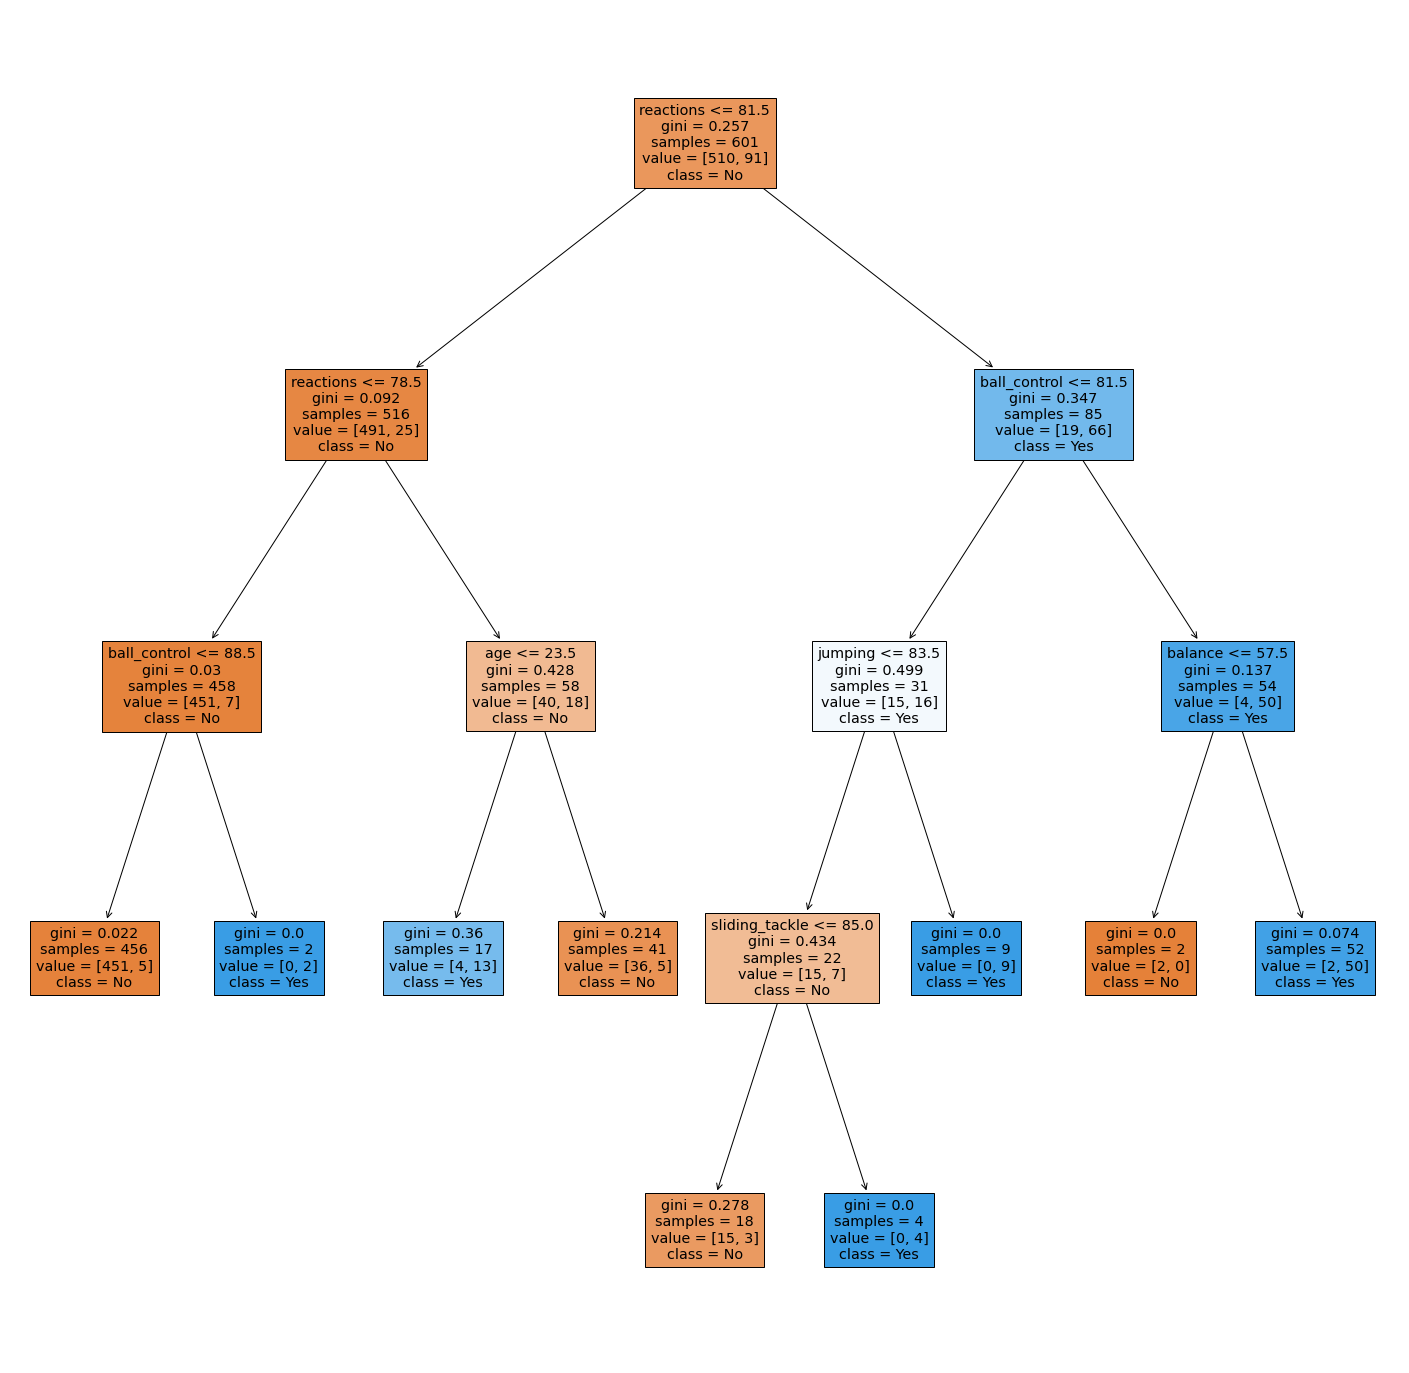

In [33]:
# Wybierz najlepsze drzewo decyzyjne
best_model = pruned_Dtc if cross_val_pruned.mean() > Rf_cross_val.mean() else Rfc
best_model.fit(X_train, y_train)

# Wizualizuj drzewo
plt.figure(figsize=(25, 25))
plot_tree(pruned_Dtc, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [30]:
# Ewaluacja modelu na zbiorze testowym
test_accuracy = best_model.score(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.3f}")


Test Accuracy: 0.947


## kNN

In [38]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=7)
    scores.append(np.mean(score))

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=k_values, y=scores, mode='markers+lines', marker=dict(symbol='square')))
fig.update_layout(
    title='Changes in accuracy because of changing k with KNN',
    xaxis=dict(title='Number of neighbors'),
    yaxis=dict(title='Accuracy'),
    showlegend=False,
    width=800,
    height=500
)
fig.show()

In [34]:
'''
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ")
print(round(accuracy, 3))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: ")
print(conf_matrix)

              precision    recall  f1-score   support

          No       0.91      0.99      0.95       131
         Yes       0.88      0.35      0.50        20

    accuracy                           0.91       151
   macro avg       0.89      0.67      0.72       151
weighted avg       0.90      0.91      0.89       151

Accuracy: 
0.907

Confusion matrix: 
[[130   1]
 [ 13   7]]
